# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data/creditcard.csv")
# data.drop_duplicates()

In [3]:
# PCAs(principal componant Analysis) of the time and amount column 

mean = data[['Time', 'Amount']].mean(axis = 0)
std = data[['Time', 'Amount']].std(axis = 0)

data[['Time', 'Amount']] -= mean
data[['Time', 'Amount']] /= std

# data

In [4]:
features_x = data.loc[:, 'Time':'Amount']
# features_x
feature_y = data['Class']
# feature_y

In [5]:
train_data = features_x
train_label = feature_y

In [6]:
print("length of traing data: ", len(train_data), "\nlength of traing samples: ", len(train_label),)

length of traing data:  284807 
length of traing samples:  284807


In [7]:
# print(train_data)
# print(train_label)

In [8]:
train_x = train_data[:199364]  # first 70% for training validation 
train_y = train_label[:199364]
test_x = train_data[199364:]   # last 30 % for testing
test_y = train_label[199364:]

In [9]:
print(len(train_x))
print(len(train_y))

199364
199364


In [10]:
val_x = train_x[99682:]     # split data into 20%  for validation
val_y = train_y[99682:]
train_x = train_x[:99682]      # split data into 50%  for training
train_y = train_y[:99682]

In [11]:
print(train_x.shape)
print(train_y.shape)

(99682, 30)
(99682,)


## Strcturing the model

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(30, activation= 'relu', input_shape = (train_x.shape[1],  ) ))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

Using TensorFlow backend.


### Compiling the model

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics= ['acc'] )#binary_crossentropy

### Training the Model

In [14]:
model.fit(train_x, train_y, epochs=100, batch_size=512, validation_data=(val_x, val_y))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 99682 samples, validate on 99682 samples
Epoch 1/100
99682/99682 [==============================] - 1s 7us/step - loss: 0.0400 - acc: 0.9946 - val_loss: 0.0227 - val_acc: 0.9958
Epoch 2/100
99682/99682 [==============================] - 0s 5us/step - loss: 0.0116 - acc: 0.9978 - val_loss: 0.0245 - val_acc: 0.9946
Epoch 3/100
99682/99682 [==============================] - 0s 4us/step - loss: 0.0114 - acc: 0.9978 - val_loss: 0.0136 - val_acc: 0.9974
Epoch 4/100
99682/99682 [==============================] - 0s 4us/step - loss: 0.0114 - acc: 0.9978 - val_loss: 0.0117 - val_acc: 0.9978
Epoch 5/100
99682/99682 [==============================] - 1s 6us/step - loss: 0.0115 - acc: 0.9976 - val_loss: 0.0101 - val_acc: 0.9980
Epoch 6/100
99682/99682 [==============================] - 0s 5us/step - loss: 0.0115 - acc: 0.9978 - val_loss: 0.0108 - val_acc: 0.9977
Epoch 7/100
99682/99682 [========

99682/99682 [==============================] - 0s 5us/step - loss: 0.0114 - acc: 0.9975 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 57/100
99682/99682 [==============================] - 0s 5us/step - loss: 0.0114 - acc: 0.9975 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 58/100
99682/99682 [==============================] - 0s 5us/step - loss: 0.0114 - acc: 0.9975 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 59/100
99682/99682 [==============================] - 0s 5us/step - loss: 0.0114 - acc: 0.9975 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 60/100
99682/99682 [==============================] - 0s 4us/step - loss: 0.0114 - acc: 0.9975 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 61/100
99682/99682 [==============================] - 0s 5us/step - loss: 0.0114 - acc: 0.9975 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 62/100
99682/99682 [==============================] - 0s 5us/step - loss: 0.0114 - acc: 0.9975 - val_loss: 0.0102 - val_acc: 0.9979
Epoch 63/100
99682/99682 [=====================

In [15]:
Eval_results = model.evaluate(test_x, test_y)
Eval_results

85443/85443 [==============================] - 2s 21us/step


[0.016588381820118663, 0.9961962699890137]

In [16]:
model.history.history
model.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

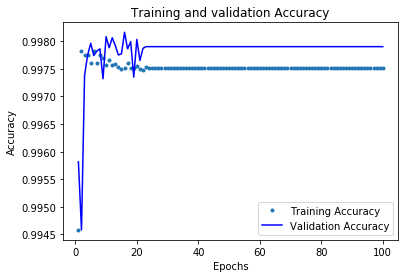

In [17]:
import matplotlib.pyplot as plt

history_dict = model.history.history
acc = history_dict['acc']
# loss_values = history_dict['loss']
val_acc = history_dict['val_acc']
# val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
epochs_val = range(1, len(val_acc) + 1)

plt.plot(epochs, acc, '.', label='Training Accuracy')
plt.plot(epochs_val, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

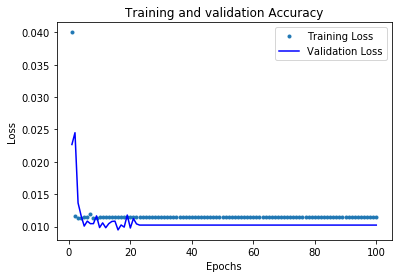

In [18]:
history_dict = model.history.history
# acc = history_dict['acc']
loss_values = history_dict['loss']
# val_acc = history_dict['val_acc']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
epochs_val = range(1, len(val_acc) + 1)

plt.plot(epochs, loss_values, '.', label='Training Loss')
plt.plot(epochs_val, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Try to avoid overfitting

In [19]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(30,kernel_regularizer=regularizers.l1(0.001) , activation= 'relu', input_shape = (train_x.shape[1],  ) ))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics= ['acc'] )#binary_crossentropy

In [20]:
model.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(val_x, val_y))

Train on 99682 samples, validate on 99682 samples
Epoch 1/20
99682/99682 [==============================] - 1s 11us/step - loss: 0.1869 - acc: 0.9931 - val_loss: 0.0980 - val_acc: 0.9984
Epoch 2/20
99682/99682 [==============================] - 1s 7us/step - loss: 0.0634 - acc: 0.9977 - val_loss: 0.0339 - val_acc: 0.9984
Epoch 3/20
99682/99682 [==============================] - 1s 8us/step - loss: 0.0287 - acc: 0.9980 - val_loss: 0.0144 - val_acc: 0.9984
Epoch 4/20
99682/99682 [==============================] - 1s 8us/step - loss: 0.0208 - acc: 0.9979 - val_loss: 0.0091 - val_acc: 0.9989
Epoch 5/20
99682/99682 [==============================] - 1s 7us/step - loss: 0.0178 - acc: 0.9982 - val_loss: 0.0087 - val_acc: 0.9991
Epoch 6/20
99682/99682 [==============================] - 1s 7us/step - loss: 0.0136 - acc: 0.9983 - val_loss: 0.0079 - val_acc: 0.9991
Epoch 7/20
99682/99682 [==============================] - 1s 7us/step - loss: 0.0129 - acc: 0.9982 - val_loss: 0.0087 - val_acc: 0.99

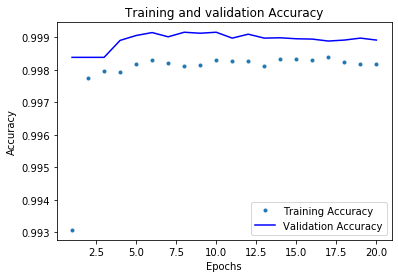

In [21]:
history_dict = model.history.history
acc = history_dict['acc']
# loss_values = history_dict['loss']
val_acc = history_dict['val_acc']
# val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
epochs_val = range(1, len(val_acc) + 1)

plt.plot(epochs, acc, '.', label='Training Accuracy')
plt.plot(epochs_val, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

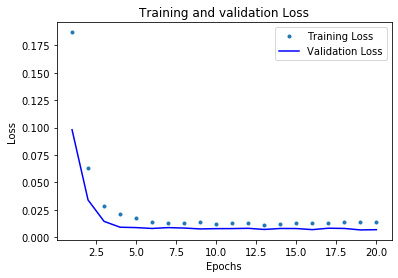

In [22]:
history_dict = model.history.history
# acc = history_dict['acc']
loss_values = history_dict['loss']
# val_acc = history_dict['val_acc']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
epochs_val = range(1, len(val_loss_values) + 1)

plt.plot(epochs, loss_values, '.', label='Training Loss')
plt.plot(epochs_val, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
Eval_results = model.evaluate(test_x, test_y)
Eval_results

85443/85443 [==============================] - 1s 14us/step


[0.005980760197636856, 0.9992977976799011]

In [24]:
predicted = model.predict(test_x)

if predicted[0][0] == 0:
    print("This is a Fraudulent Transecion")
else:
    print('This is safe Transection....')

This is a Fraudulent Transecion
